In [4]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
import collections

In [5]:
# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [6]:
# Combine the data into a single dataset
combine_ride_city_df = pd.merge(city_data_df,ride_data_df,how='outer', on='city')

# Display the data table for preview
combine_ride_city_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [7]:
# Set plt figure size and colors
plt.figure(figsize=(10,8))
colors = ("orange","yellow","blue")

<Figure size 720x576 with 0 Axes>

In [8]:
# Define colors for city types
def attribute_color(type):
    colors = {
        'Urban':'orange',
        'Rural':'yellow',
        'Suburban':'blue'
    }
    return colors.get(type,'white')
color_region = list()
qty_types = list(sorted(set(combine_ride_city_df['type'])))
qty_types

['Rural', 'Suburban', 'Urban']

In [19]:
# Calculate driver count
driver_count = pd.DataFrame(combine_ride_city_df.groupby(['type','city'])['driver_count'].mean())

In [9]:
# Loop through types to assign color and create a list to hold this
color_region = list()

for city_type in qty_types:
    city_color_type = attribute_color(city_type)
    color_region.append(city_color_type)

In [23]:
# Create a loop function to find each city type
city_type_df = [combine_ride_city_df.loc[combine_ride_city_df['type'] == citytype,:] for citytype in qty_types]

In [24]:
# Create a loop function to find the rides per city for each city type
num_rides = [city_specific.groupby('city')['ride_id'].count() for city_specific in city_type_df]

In [25]:
# Create a loop function to find the average fare per city for each city type
avg_fare = [city_specific.groupby('city')['fare'].mean() for city_specific in city_type_df]

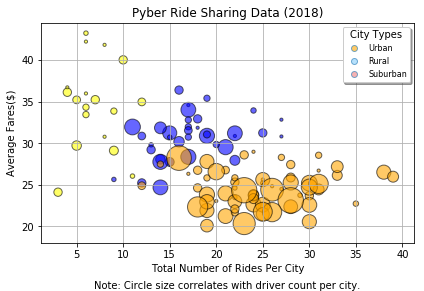

In [33]:
# Plot the graph
for x,y,z in zip(num_rides,avg_fare, color_region):
    plt.scatter(x, y, s=10*driver_count, c=z, edgecolor='black', alpha =0.6)

plt.title('Pyber Ride Sharing Data (2018)')
plt.ylabel('Average Fares($)')
plt.xlabel('Total Number of Rides Per City')

# Create the legend
types = ['Urban','Rural','Suburban']
legend1_line2d = list()
for step in range(len(colors)):
    legend1_line2d.append(mlines.Line2D([0], [0],
                                        linestyle='none',
                                        marker='o',
                                        alpha=0.6,
                                        markersize=6,
                                        markerfacecolor=colors[step]))
legend1 = plt.legend(legend1_line2d,
                    types,
                    numpoints=1,
                    title='City Types',
                    fontsize=8,
                    loc='upper right',
                    shadow=True)

# Add a note about the graph
plt.annotate('Note: Circle size correlates with driver count per city.',
            xy=(0.5, 0), xytext=(0, 0.5),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=10, ha='center', va='bottom')

# Plot formatting 
plt.tight_layout()
plt.savefig('graphs/Pyber_Scatterplot.png')
plt.grid()


## Total Fares by City Type

In [11]:
# Calculate Type Percents
combine_ride_city_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [12]:
# Calculate total unique fares
total_fares = len(combine_ride_city_df['fare'].unique())
total_fares

1841

In [13]:
# Calculate rural fare counts
rural_fares_df = combine_ride_city_df.loc[combine_ride_city_df['type'] == 'Rural',:]
rural_fares = len(rural_fares_df['fare'].unique())
rural_fares

122

In [14]:
# Calculate urban fare counts
urban_fares_df = combine_ride_city_df.loc[combine_ride_city_df['type'] == 'Urban',:]
urban_fares = len(urban_fares_df['fare'].unique())
urban_fares

1346

In [15]:
# Calculate suburban fare counts
suburban_fares_df = combine_ride_city_df.loc[combine_ride_city_df['type'] == 'Suburban',:]
suburban_fares = len(suburban_fares_df['fare'].unique())
suburban_fares

584

In [16]:
# Set labels, sizes, colors, and explode for the pie graph
labels = ["Rural", "Suburban", "Urban"]

sizes = [122, 584, 1346]

colors = ["orange", "lightskyblue", "lightcoral"]

explode = [0.1,0.1,0]

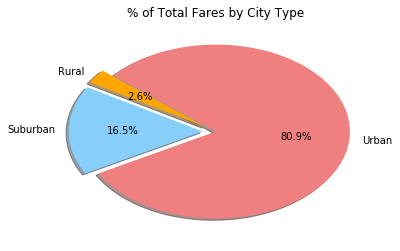

In [34]:
# Plot the pie graph
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")
plt.savefig('graphs/PyberPie_Fares_by_City.png')
plt.show()

## Total Rides by City Type

In [75]:
# Calculate Ride Percents
combine_ride_city_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [76]:
# Calculate unique ride_ids to find total rides
total_rides = len(combine_ride_city_df['ride_id'].unique())
total_rides

2375

In [77]:
# Calculate rural rides
rural_rides_df = combine_ride_city_df.loc[combine_ride_city_df['type'] == 'Rural',:]
rural_rides = len(rural_rides_df['ride_id'].unique())
rural_rides

125

In [78]:
# Calculate suburban rides
suburban_rides_df = combine_ride_city_df.loc[combine_ride_city_df['type'] == 'Suburban',:]
suburban_rides = len(suburban_rides_df['ride_id'].unique())
suburban_rides

625

In [79]:
# Calculate urban rides
urban_rides_df = combine_ride_city_df.loc[combine_ride_city_df['type'] == 'Urban',:]
urban_rides = len(urban_rides_df['ride_id'].unique())
urban_rides

1625

In [81]:
# Set labels, sizes, colors, and explore for pie graph
labels = ["Rural", "Suburban", "Urban"]

sizes = [125, 625, 1625]

colors = ["orange", "lightskyblue", "lightcoral"]

explode = [0.1,0.1,0]

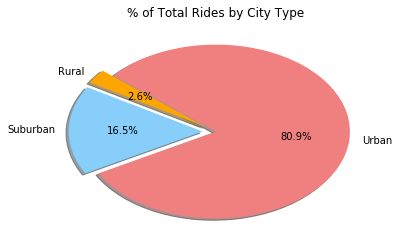

In [35]:
# Plot pie graph
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")
plt.savefig('graphs/PyberPie_Rides_by_CityType.png')
plt.show()

## Total Drivers by City Type

In [298]:
# Calculate Driver Percents
combine_ride_city_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [23]:
# Create a dataframe for city type and driver_count per city
new_df = combine_ride_city_df.drop_duplicates(subset='city', keep='first', inplace=False)
new_df.groupby('type').agg({'driver_count': ['sum']})

,driver_count
,sum
type,
Rural,78
Suburban,490
Urban,2405


In [85]:
# Set labels, sizes, colors, and explore for pie graph
labels = ["Rural", "Suburban", "Urban"]

sizes = [78, 490, 2405]

colors = ["orange", "lightskyblue", "lightcoral"]

explode = [0.1,0.1,0]

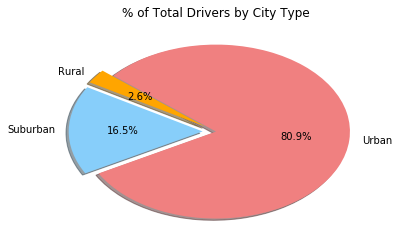

In [36]:
# Plot pie graph
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.savefig('graphs/PyberPie_Drivers_by_CityType.png')
plt.show()